# Weather Analysis for 4/24/2023

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from apikeys import weather_api

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate Random Cities

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

## Fetch Data Through API

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

## Save to CSV so we don't have to run that loooong code ever again

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ["City", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed",
                                                  "Country", "Date"])

# Show Record Count
city_data_df.count()

In [ ]:
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("Output Data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("Output Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-3.15,54,0,1.37,RU,1682379913
1,motygino,58.1831,94.7592,2.08,89,100,1.28,RU,1682380484
2,harstad,68.7990,16.5293,-1.32,72,9,1.34,NO,1682380484
3,adamstown,-25.0660,-130.1015,25.70,87,88,6.92,PN,1682380485
4,port-aux-francais,-49.3500,70.2167,4.58,66,63,7.55,TF,1682380485


## Part 1: Required Scatterplots

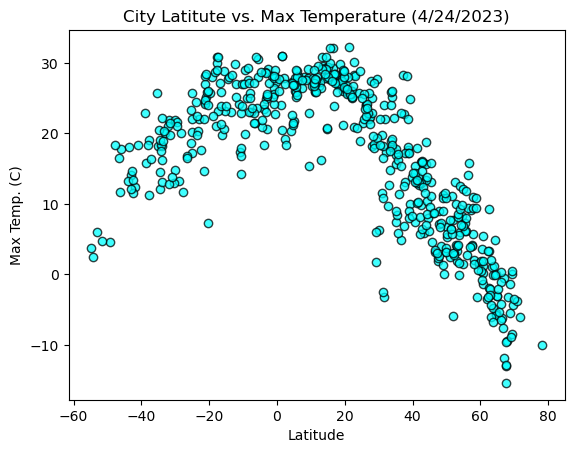

In [3]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat,temp, color = "cyan", alpha = .75, edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (C)")
plt.title("City Latitute vs. Max Temperature (4/24/2023)")

# Save the figure
plt.savefig("Output Data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(lat,humidity,color = "cyan", alpha = .75, edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitdude vs. Humidity (4/24/2023)")
# Save the figure
plt.savefig("Output Data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]
plt.scatter(lat,clouds,color = "cyan", alpha = .75, edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (4/24/2023)")
# Save the figure
plt.savefig("Output Data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(lat,wind,color = "cyan",alpha = .75, edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed 4/24/2023")
# Save the figure
plt.savefig("Output Data/Fig4.png")

# Show plot
plt.show()

##  Part 2: Linear Regressions

In [4]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    lm = linregress(x,y)
    slope = lm[0]
    intercept = lm[1]
    r = lm[2]
    predicted_y = slope*x + intercept
    eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    lin_plot = plt.scatter(x,y,color = "cyan", alpha = .75, edgecolor = "black")
    plt.plot(x,predicted_y, color = "red")
    #plt.annotate(eq,(-40,80), color = "red")
    #plt.xlabel(f"{x["Name"]}")
    #plt.ylabel(f"{y}")
    #plt.title(f"{x} vs {y}")
    return(lin_plot,print(f"The r-value is {r}"))


In [5]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-3.15,54,0,1.37,RU,1682379913
1,motygino,58.1831,94.7592,2.08,89,100,1.28,RU,1682380484
2,harstad,68.7990,16.5293,-1.32,72,9,1.34,NO,1682380484
6,wuyo,10.3852,11.6968,26.69,60,100,1.04,NG,1682380486
8,harper,4.3750,-7.7169,27.28,84,100,2.79,LR,1682380487


In [6]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,25.70,87,88,6.92,PN,1682380485
4,port-aux-francais,-49.3500,70.2167,4.58,66,63,7.55,TF,1682380485
5,arraial do cabo,-22.9661,-42.0278,21.98,83,0,0.00,BR,1682380464
7,howard springs,-12.4970,131.0470,29.90,73,40,4.78,AU,1682380487
11,port-gentil,-0.7193,8.7815,27.98,89,20,1.54,GA,1682380489


## Temperature vs. Latitude

The r-value is -0.8919237676531268


(<matplotlib.collections.PathCollection at 0x2554f176980>, None)

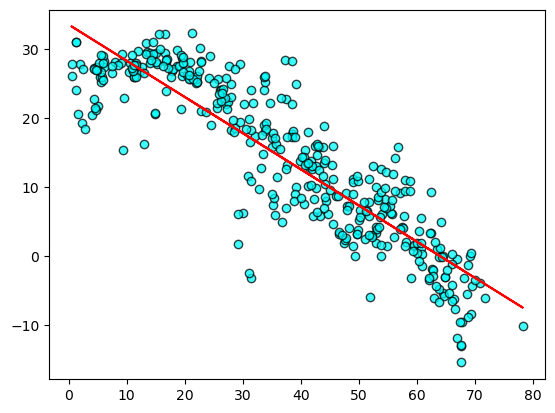

In [7]:
#Northern Hemisphere
lat = northern_hemi_df["Lat"]
temp = northern_hemi_df["Max Temp"]
lin_reg(lat,temp)

This data displays a moderate-strong negatice linear correlation. This means that as latitude increases, maximum temperature decreases. This makes sense becasue typically, the futher north you go, the colder it gets!

The r-value is 0.7262745941112134


(<matplotlib.collections.PathCollection at 0x2554f651240>, None)

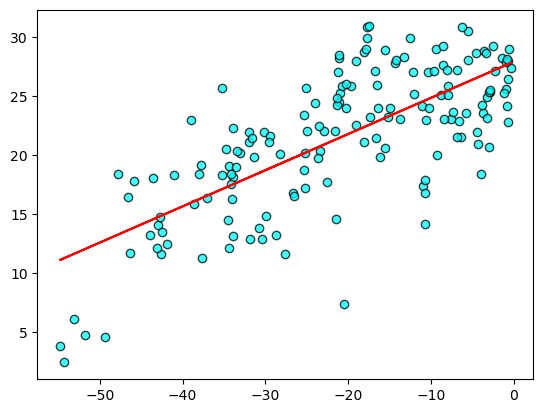

In [8]:
#Southern Hemisphere
lat = southern_hemi_df["Lat"]
temp = southern_hemi_df["Max Temp"]
lin_reg(lat,temp)

This data displays a moderate positive linear correlation. This means that as the latitude increases, so does the temperature. This makes sense for the southern hemisphere (picture moving north from antartica all the way to the equator!). Also, we should expect every pair of graphs to be inverses of each other (nothern and southern hemispheres) 

## Humidity vs. Latitude

The r-value is 0.11880932899753237


(<matplotlib.collections.PathCollection at 0x2554f6bece0>, None)

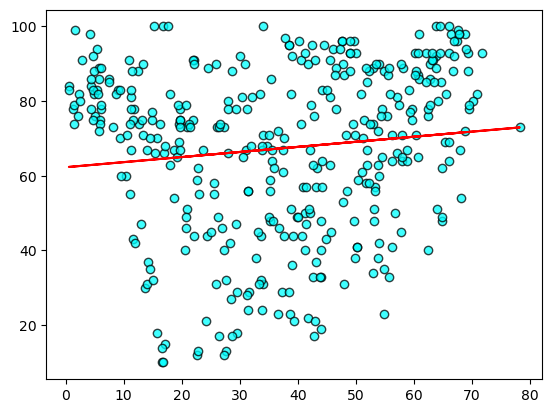

In [9]:
#Northern Hemi
lat = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
lin_reg(lat,humidity)

This data displays a very weak positive linear correlation. As we move further north, humidity is predicted to increase only slightly. This could be due to the time the data was obtained (spring time), as places could be in a more humid season in the northern hemisphere. 

The r-value is 0.22238171802076198


(<matplotlib.collections.PathCollection at 0x2554f7511e0>, None)

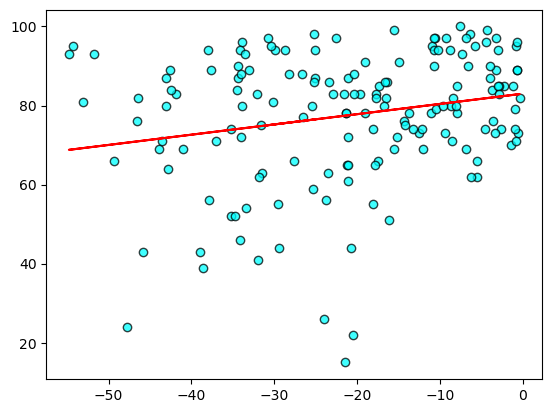

In [10]:
#Southern Hemi
lat= southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
lin_reg(lat,humidity)

This data displays a very weak positive linear relationship as well. 

## Wind Speed vs. Latitude

The r-value is 0.07385802119222844


(<matplotlib.collections.PathCollection at 0x2554f7ba2f0>, None)

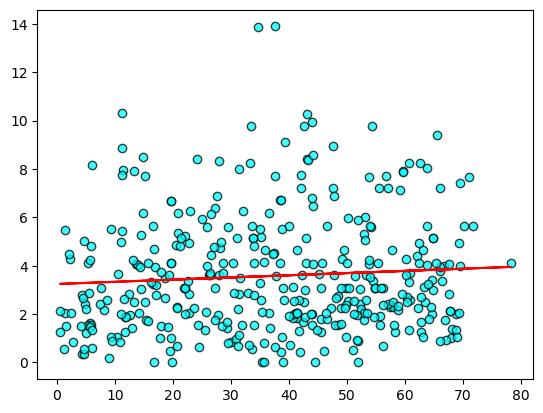

In [11]:
#Nothern Hemi
lat = northern_hemi_df["Lat"]
wind = northern_hemi_df["Wind Speed"]
lin_reg(lat,wind)

This graph displays a very,very weak correlation between latitude and wind speed. This could be evidende that a linear relationship is not present between these variables 

The r-value is -0.31988164163146476


(<matplotlib.collections.PathCollection at 0x25550862290>, None)

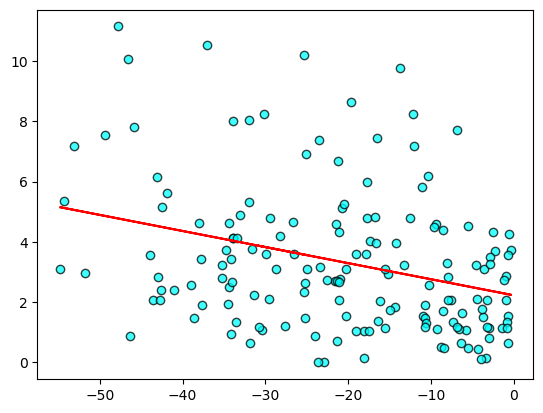

In [12]:
#Southern Hemi
lat = southern_hemi_df["Lat"]
wind = southern_hemi_df["Wind Speed"] 
lin_reg(lat,wind)

This graph displays a fairly weak negative relationship between latitude and wind speed. This could suggest that there are lower wind speeds nearer to the equator, but the relationship is too weak to make any conjectures

## Cloudiness vs. Latitude

The r-value is 0.12886007699180196


(<matplotlib.collections.PathCollection at 0x255508c03d0>, None)

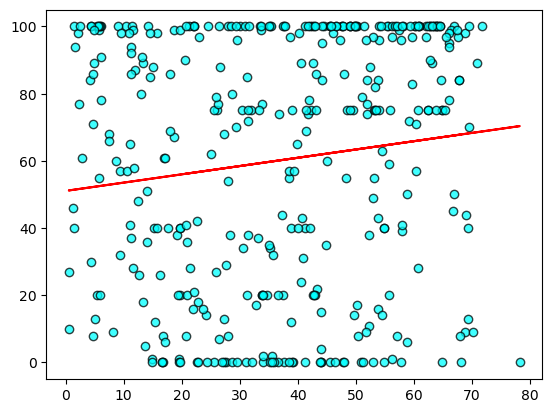

In [13]:
#Northern Hemi
lat = northern_hemi_df["Lat"]
clouds = northern_hemi_df["Cloudiness"]
lin_reg(lat,clouds)

The r-value is 0.09122492454427727


(<matplotlib.collections.PathCollection at 0x25550956a70>, None)

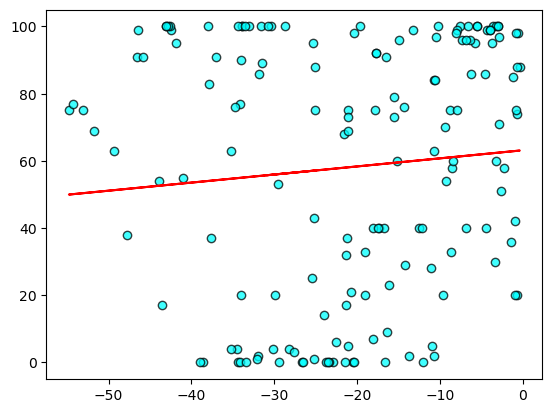

In [14]:
#Southern Hemi
lat = southern_hemi_df["Lat"]
clouds = southern_hemi_df["Cloudiness"]
lin_reg(lat,clouds)

Finally, these graphs display a weak positive correlation for both the northern and southern hemispheres. The strength (or lack thereof) of  the correlation may indicate that there is not  linear relationship between latitude and cloudiness